# Chapter 03 신경망

## 3.2 활성화 함수

활성화 함수는 임계값을 경계로 출력이 바뀌는데, 이런 함수를 계단 함수(Step function)이라고 한다. 퍼셉트론에서는 활성화 함수로 계단 함수를 이용한다. 여기서 활성화 함수를 계단 함수에서 다른 함수로 변경하는 것이 신경망의 시작이다.

### 3.2.1 시그모이드 함수

$h(x) = \frac{1}{1 + \exp(-x)}$

### 3.2.2 계단 함수 구현하기

In [1]:
import numpy as np
import pickle

In [1]:
def step_function(x):
    if x >0 :
        return 1
    else :
        return 0

In [2]:
def step_function(x):
    y = x > 0
    return y.astype(np.int)

In [3]:
import numpy as np
x = np.array([-1.0, 1.0, 2.0])
x

array([-1.,  1.,  2.])

In [4]:
y = x > 0
y

array([False,  True,  True], dtype=bool)

In [6]:
y = y.astype(np.int)
y

array([0, 1, 1])

In [7]:
step_function(np.array([1.0, 2.0]))

array([1, 1])

### 3.2.3 계단 함수의 그래프

In [9]:
import numpy as np
import matplotlib.pylab as plt

In [10]:
def step_function(x):
    return np.array(x>0, dtype=int)

In [11]:
x = np.arange(-5.0, 5.0, 0.1)

In [13]:
y = step_function(x)

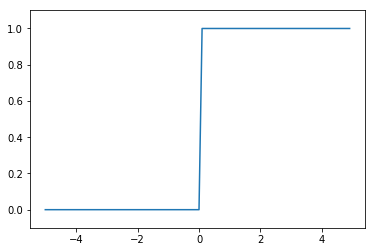

In [18]:
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y축의 범위 지정
plt.show()

0을 경계로 계단처럼 출력이 0에서 1로 바뀜. 

### 3.2.4 시그모이드 함수 구현하기

In [20]:
def sigmoid(x): 
    return 1 / (1 + np.exp(-x))

In [21]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([ 0.26894142,  0.73105858,  0.88079708])

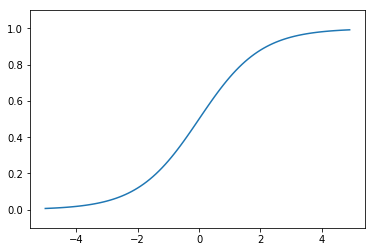

In [23]:
x = np.arange(-5, 5, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y축 범위 지정
plt.show()

### 3.2.6 비선형 함수

계단 함수와 시그모이드 함수 모두 <b>비선형 함수</b>이다. 신경망에서는 활성화 함수로 비선형 함수를 사용해아 하며, 선형 함수를 이용하면 신경망의 층을 깊게 하는 의미가 없다. 여기서 선형 함수는 f(x) = ax + b 여기서 a와 b는 상수. 층을 쌓는 혜택을 얻고 싶다면 활성화 함수로는 반드시 비선형 함수를 사용해야 함
<br>
<center>y(x) = h(h(h(x))) where h(x) = cx</center>
<center>y(x) = c \* c \* c \* x </center>
<center>y(x) = ax, a = $c^{3}$</center> </br>

### 3.2.7 ReLU 함수

**ReLU**(Rectified Linear Unit)는 입력이 0을 넘으면 그 입력을 그대로 출력하고, 0 이하이면 0을 출력하는 함수

<center>h(x) = x (x > 0)<br>
h(x) = 0 (x $\leq$ 0) </center>

In [25]:
def relu(x):
    return np.maximum(0, x)

## 3.3 다차원 배열의 계산

배열의 차원 수는 np.dim() 함수로 확인 가능. 형상은 인스턴스 변수인 shape으로 알 수 있음.

In [28]:
B = np.array([[1, 2], [3, 4], [5, 6]])
print (B)

[[1 2]
 [3 4]
 [5 6]]


In [30]:
np.ndim(B)

2

In [31]:
B.shape

(3, 2)

### 3.3.2 행렬의 내적(행렬 곱)

In [32]:
A = np.array([[1,2], [3,4]])
A.shape

(2, 2)

In [33]:
B = np.array([[5,6], [7,8]])
B.shape

(2, 2)

In [34]:
np.dot(A, B)

array([[19, 22],
       [43, 50]])

### 3.3.2 행렬의 내적(행렬 곱)

In [35]:
A = np.array([[1,2], [3,4]])
A.shape

(2, 2)

In [37]:
B = np.array([[5,6], [7,8]])
B.shape

(2, 2)

In [39]:
np.dot(A, B)

array([[19, 22],
       [43, 50]])

In [40]:
A = np.array([[1, 2], [3, 4], [5, 6]])
A.shape

(3, 2)

In [41]:
B = np.array([7, 8])
B.shape

(2,)

In [42]:
np.dot(A, B)

array([23, 53, 83])

### 3.3.3 신경망의 내적

In [52]:
X = np.array([1, 2])
X.shape

(2,)

In [53]:
W = np.array([[1, 3, 5], [2, 4, 6]])
print (W)

[[1 3 5]
 [2 4 6]]


In [54]:
W.shape

(2, 3)

In [55]:
Y = np.dot(X, W)
print (Y)

[ 5 11 17]


## 3.4 3층 신경망 구현하기

### 3.4.1 표기법 설명

$w^{(1)}_{12}$ 여기서 (1)은 1층의 가중치. 1은 다음 층의 1번째 뉴런, 2는 앞 층의 2번째 뉴런을 뜻함

### 3.4.3 구현 정리

항등 함수는 입력을 그대로 출력하는 함수. 여기서는 이를 출력층의 활성화 함수로 이용. 출력층의 활성화 함수는 풀고자 하는 문제의 성질에 따라 달라질 수 있음. 회귀에서는 항등 함수를, 2클래스 분류에는 시그모이드 함수를, 다중 클래스 분류에는 소프트맥스 함수를 사용하는 것이 일반적

In [56]:
def identify_function(x):
    return x

In [65]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

In [66]:
def forward(network, x):

    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identify_function(a3)
    
    return y

In [67]:
network = init_network()

In [68]:
x = np.array([1.0, 0.5])
y = forward(network, x)

In [69]:
print(y)

[ 0.31682708  0.69627909]


## 3.5 출력층 설계하기

### 3.5.1 항등 함수와 소프트맥스 함수 구현하기

**항등 함수** 는 입력을 그대로 출력한다. 이는 입력과 출력이 항상 같다는 뜻이다.<br>
한편, 분류에서 사용하는 **소프트맥스 함수**(softmax function)은 다음과 같다.

$y_k = \frac{\exp(a_k)}{\sum^{n}_{i=1}\exp(a_i)}$

exp(x)는 $e^{x}$ 을 뜻하는 지수 함수.(e는 자연상수) n은 출력층의 뉴런 수, $y_k$는 그중 k번째 출력임을 뜻함. 소프트맥스의 출력은 모든 입력 신호로부터 화살표를 받는다. 출력층의 각 뉴런이 모든 입력 신호에서 영향을 받기 때문이다.

소프트맥스 함수 구현

In [78]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

In [79]:
a = np.array([0.3, 2.9, 4.0])

In [80]:
softmax(a)

array([ 0.01821127,  0.24519181,  0.73659691])

### 3.5.2 소프트맥스 함수 구현 시 주의점

지수 함수는 쉽게 아주 큰 값을 내뱉기 때문에, 위의 소프트맥스 함수에서는 오버플로 문제가 발생한다. 가령 $e^{10}$ 은 2만 이상이고 $e^{100}$은 0이 40개가 넘는 큰 값이 된다. 이런 큰 값끼리 나눗셈을 하면 결과 수치가 불안정해진다.

In [87]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

여기서 C는 어떤 값을 대입해도 결과는 바뀌지 않지만, 주로 오버플로우를 막기 위해서는 입력 신호 중 최대값을 이용하는 것이 일반적이다.

In [83]:
a = np.array([1010, 1000, 990])
np.exp(a) / np.sum(np.exp(a))

/root/.pyenv/versions/3.5.3/envs/hrc/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/root/.pyenv/versions/3.5.3/envs/hrc/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


array([ nan,  nan,  nan])

In [84]:
c = np.max(a)

In [85]:
a - c

array([  0, -10, -20])

In [86]:
np.exp(a - c) / np.sum(np.exp(a-c))

array([  9.99954600e-01,   4.53978686e-05,   2.06106005e-09])

### 3.5.3 소프트맥스 함수의 특징

softmax() 함수를 이용하면 신경망의 출력은 다음과 같이 계산할 수 있습니다.

In [88]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print (y)

[ 0.01821127  0.24519181  0.73659691]


In [89]:
np.sum(y)

1.0

소프트맥스 함수의 출력은 0에서 1사이의 실수이고 출력 총합의 값은 1이다. 이 성질 더분에 소프트맥스 함수의 출력을 '확률'로 해석할 수 있다. 앞의 예에서 y[0]의 확률은 0.018(1.8%), y[1]의 확률은 0.245(24.5%), y[2]의 확률은 0.737(73.7%)로 해석할 수 있다. 또한 소프트맥스 함수는 단조증가 함소이기 때문에 원소의 대소 관계는 변하지 않는다.<br>

신경망을 이용한 분류에서는 일반적으로 가장 큰 출력을 내는 뉴런에 해당하는 클래스로만 인식한다. 따라서 신경망으로 분류를 할 때에는 출력층의 소프트맥스 함수를 생략해도 된다. 

### 3.5.4 출력층의 뉴런 수 정하기

출력층의 뉴런 수는 풀려는 문제에 맞게 적절히 정해야 함. 분류에서는 분류하고 싶은 클래스 수로 설정하는 것이 일반적

## 3.6 손글씨 숫자 인식

### 3.6.1 MNIST 데이터셋

MNIST의 이미지 데이터는 28 X 28 크기의 회색조 이미지(1채널)이며, 각 픽셀은 0에서 255까지의 값을 취한다. 각 이미지에는 7, 2, 1와 같이 그 이미지가 실제 의미하는 숫자가 레이블로 붙어 있다.

파이썬에는 pickle(피클)이라는 기능이 있다. 실행 중에 특정 객체를 파일로 저장하는 기능인데, 저장해둔 pickle 파일을 로드하면 실행 당시의 객체를 즉시 복원할 수 있다.

In [91]:
import sys, os

In [97]:
sys.path.append('/root/entropylab/hrc/deep_learning_from_scratch_org/deep-learning-from-scratch/')

In [98]:
from dataset.mnist import load_mnist

In [99]:
# 처음은 시간이 몇분 걸림
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize = False)

Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!


In [100]:
print(x_train.shape)

(60000, 784)


In [101]:
print(t_train.shape)

(60000,)


In [102]:
print(x_test.shape)

(10000, 784)


In [103]:
print(t_test.shape)

(10000,)


인수로는 normalize, flatten, one_hot_label 세가지가 있다.<br>
첫번째 인수인 normalize는 0~1사이의 값으로 정규화 여부를 결정한다.<br>
두번째 인수인 flatten은 입력 이미지를 평탄하게 한다. <br>
세번째 인수인 one_hot_label은 레이블을 **원-핫 인코딩** 형태로 저장할지를 정한다. 여기서 False면 '7'이나 '2'와 같이 숫자 형태의 레이블을 저장하고, True 일때에는 레이블을 원-핫 인코딩하여 저장한다.

In [117]:
import sys, os
sys.path.append('/root/entropylab/hrc/deep_learning_from_scratch_org/deep-learning-from-scratch/')
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    return pil_img

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize = False)

img = x_train[0]
label = t_train[0]
print(label)

print (img.shape)
img = img.reshape(28, 28)
print (img.shape)

img_show(img)

5
(784,)
(28, 28)


### 3.6.2 신경망의 추론 처리

이미지 크기가 28 X 28 = 784이고 0에서 9까지의 숫자를 구분하는 문제이기 때문에, 입력층 뉴런이 784개, 출력층 뉼너이 10개가 된다. 은닉층은 총 두개이고, 첫번째 은닉층에서 50개의 뉴런을 두번째 은닉층에서는 100개의 뉴런을 임의로 배치한다.

In [119]:
def get_data():
    (x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, flatten=True, one_hot_label=False)
    
    return x_test, t_test

In [120]:
def init_network():
    with open ('../deep_learning_from_scratch_org/deep-learning-from-scratch/ch03/sample_weight.pkl', 'rb') as f:
        network = pickle.load(f)
        
    return network

In [129]:
def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    
    return y

**정확도 평가하기**

In [126]:
x, t = get_data()

In [127]:
network = init_network()

In [130]:
accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)
    if p == t[i]:
        accuracy_cnt +=1

print ("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


load_mnist 함수의 인수인 normalize를 True로 설정한다. 이에 0~255 범위인 각 픽셀의 값이 0.0~1.0 범위로 전환된다.(단순히 픽셀의 값을 255로 나눔)<br>
이렇게 데이터를 특정 범위로 변환하는 처리를 **정규화**(normalization)이라 하고, 신경망의 입력 데이터에 특정 변환을 가하는 것을 **전처리**(pre-processing)라고 한다. 여기서는 입력 이미지 데이터에 대한 전처리 작업으로 정규화를 수행한 셈이다.

여기서는 픽셀의 값을 255로 나누는 단순한 정규화를 수행했지만, 데이터 전체의 분포를 고려해 데이터들을 0을 중심으로 분포하도록 이동시키거나 데이터의 확산 범위를 제한하는 정규화를 수행한다. 그 이외에도 전체 데이터를 균일하게 분포시키는 데이터 **백색화**(whitening)를 진행한다.

### 3.6.3 배치 처리

하나로 묶은 입력 데이터를 **배치**(batch)라 한다. 배치는 두가지 이점이 있다. 첫째는 수치 계산 라이브러리 대부분이 큰 배열을 효율적으로 처리할 수 있도록 최적화되어 있기 때문이다. 둘째는 커다란 신경망에서는 데이터 전송이 병목으로 작용하는 경우가 있는데, 배치 처리를 함으로서 버스에 주는 부하를 줄일 수 있다. (느린 I/O를 통해 데이터를 읽는 횟수가 줄어, 빠른 CPU나 GPU로 순수 계산을 수행하는 비율이 높아진다. 즉 배치 처리를 수행함으로써 큰 배열로 이루어진 계산을 하게 되는데, 컴퓨터에서는 큰 배열을 한꺼번에 계산하는 것이 분할된 작은 배열을 여러 번 계산하는 것보다 빠르다.

배치 처리 구현

In [144]:
x, t = get_data()
network = init_network()

batch_size = 100 # 배치 크기
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i + batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])
    
print ("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


argmax()는 최대값의 인덱스를 가지고 온다. axis=1은 100 X 10의 배열 중 1번째 차원을 구성하는 각 원소에서(1번째 차원을 축으로) 최대값의 인덱스를 찾도록 한 것이다. (인덱스가 0부터 시작하니 0번째 차원이 가장 처음 차원이다.)

In [155]:
x = np.array([[0.1, 0.8, 0.1], [0.3, 0.1, 0.6], \
              [0.2, 0.5, 0.3], [0.8, 0.1, 0.1]])
print(x)

[[ 0.1  0.8  0.1]
 [ 0.3  0.1  0.6]
 [ 0.2  0.5  0.3]
 [ 0.8  0.1  0.1]]


In [152]:
y = np.argmax(x, axis=1)

In [153]:
y

array([1, 2, 1, 0])

== 연산자를 사용해 넘파이 배열끼리 비교하여 True/False로 구성된 bool 배열을 만들고, 이 결과 배열에서 True가 몇 개인지 센다.

In [157]:
y = np.array([1, 2, 1, 0])
t = np.array([1, 2, 0, 0])
print (y == t)

[ True  True False  True]


In [158]:
np.sum(y == t)

3

**이번 장에서 배운 내용 **

- 신경망에서는 활성화 함수로 시그모이드 함수와 ReLU함수 같은 매끄럽게 변화하는 함수를 이용한다.
- 넘파이의 다차원 배열을 잘 사용하면 신경망을 효율적으로 구현할 수 있다.
- 기계학습 문제는 크게 회귀와 분류로 나눌 수 있다.
- 출력층의 활성화 함수로는 회귀에서는 주로 항등 함수를, 분류에서는 주로 소프트맥스 함수를 이용한다.
- 분류에서는 출력층의 뉴런 수를 분류하려는 클래스 수와 같게 설정한다.
- 입력 데이터를 묶은 것을 배치라 하며, 추론 처리를 이 배치 단위로 진행하면 결과를 훨씬 더 빠르게 얻을 수 있다.